<a href="https://colab.research.google.com/github/oconcito8/aprendizaje-automatico-entregas-recu/blob/main/practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2 Aprendizaje Automático.

###Entrenando Algoritmos de Machine Learning para Clasificación


---
Carlos Ocón Garay

Grupo: B08





# Implementando un algoritmo de aprendizaje tipo Perceptrón en Python: Una API de Perceptrón orientada a Objetos

### EJERCICIO 1:

In [33]:
import numpy as np


class Perceptron(object):
    """Clasificador basado en perceptron.

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
       Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: matriz-1d (1d-array)
       Pesos después del fitting.
     errors_: list
       Número de clasificaciones erróneas (actualizaciones) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y): # entrena
        """Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi # el update multiplica por la entrada
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X): # entrada neta que hace la multiplicacion de la matriz por los pesos
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## Entrenando un modelo de Perceptrón en el conjunto de datos Iris

### Leyendo el dataset Iris

In [34]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Pintando los datos de Iris

Se crea y entrena un modelo Adaline utilizando Gradiente Descendente Estocástico (SGD).
La función plot_decision_regions grafica las regiones de decisión del modelo sobre los datos estandarizados.
Se etiquetan los ejes y se ajusta el diseño de la gráfica.


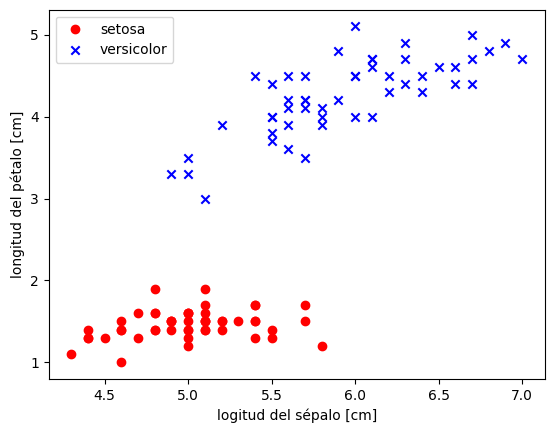

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# selecciona setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extrae longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

# pintando los datos
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('logitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Las regiones de diferentes colores indican las áreas donde el modelo predice cada clase.
La línea que separa las regiones es la frontera de decisión del clasificador.
Una buena separación de las clases en la gráfica sugiere un modelo bien entrenado.

Iris setosa (puntos rojos) se encuentra agrupada en la parte inferior izquierda de la gráfica, mostrando valores de longitud del sépalo y del pétalo relativamente pequeños.
Iris versicolor (puntos azules) se encuentra en la parte superior derecha de la gráfica, con valores mayores tanto de la longitud del sépalo como del pétalo.

### Entrenando el modelo Perceptrón

### EJERCICIO 2:

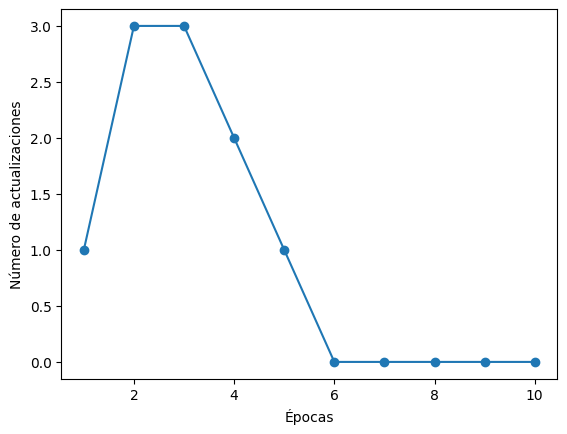

In [36]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

# plt.savefig('images/02_07.png', dpi=300)
plt.show() # nos pinta el numero de epocas e iteraciones

El número de actualizaciones aumenta en las primeras épocas, alcanzando un pico en la segunda y tercera época. A partir de la cuarta época, el número de actualizaciones disminuye rápidamente y se estabiliza en 0 desde la sexta época en adelante.
Conclusión:

 La disminución del número de actualizaciones a 0 indica que el modelo ha aprendido a clasificar correctamente los datos y ha alcanzado una solución estable en menos de 6 épocas.
Eficiencia del Modelo: El modelo muestra una convergencia rápida, lo que sugiere que la tasa de aprendizaje y el número de iteraciones son adecuados para los datos utilizados.

El análisis demuestran que el Perceptrón ha sido capaz de aprender y clasificar correctamente los datos en pocas épocas, mostrando una rápida convergencia y minimización de los errores de clasificación.

### EJERCICIO 3:

### Una función para pintar las regiones de decisión

In [37]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # configuramos el generador de marcadores y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # traza/pinta la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # pinta las muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        if markers[idx] == 'x':
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label=cl)
        else:
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label=cl,
                        edgecolor='black')

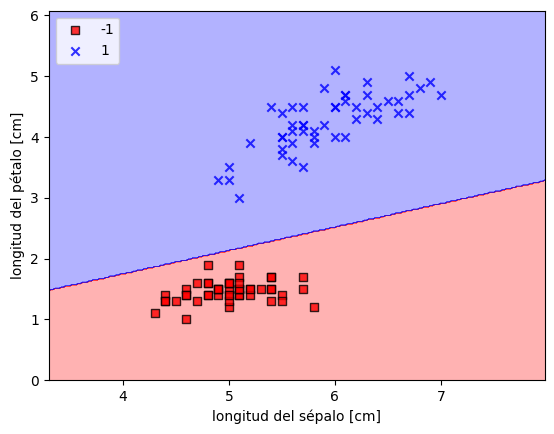

In [38]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('longitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


La gráfica muestra las regiones de decisión de un Perceptrón entrenado para clasificar dos especies de Iris (Iris setosa e Iris versicolor) en base a las longitudes del sépalo y del pétalo.

Elementos de la Gráfica:

Región Roja: Corresponde a la clase -1 (Iris setosa).

Región Azul: Corresponde a la clase 1 (Iris versicolor).

La línea que separa las dos regiones de diferentes colores representa la frontera de decisión del clasificador, donde el Perceptrón cambia su predicción de una clase a otra.

La gráfica muestra una clara separación entre las dos clases. Los puntos rojos y azules están mayormente agrupados en sus respectivas regiones de decisión, indicando que el modelo clasifica correctamente la mayoría de los puntos.

La frontera de decisión parece dividir adecuadamente las dos clases,pero algunos puntos pueden estar cerca de la frontera de decisión, lo que puede indicar posibles errores de clasificación en casos límite.

### EJERCICIO 4:

# Neurona lineales Adaptativas (ADALINE) y la convergencia del aprendizaje: Implementando una ADALINE en Python

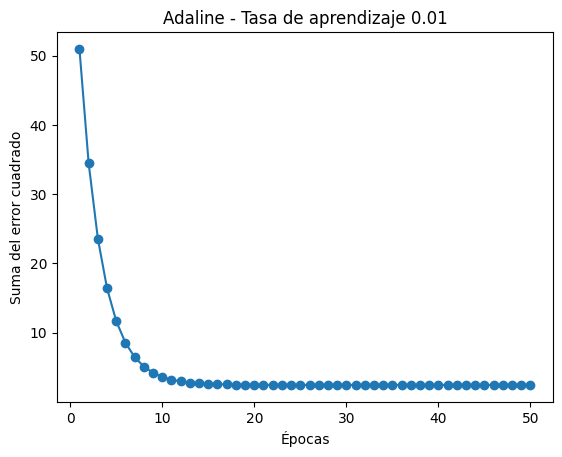

In [39]:

class AdalineGD:
    """Clasificador ADaptive LInear NEuron (Adaline)

    Parámetros
    ----------
    eta: float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
    random_state: int
        Semilla del generador de números aleatorios para
        inicialización de los pesos de forma aleatoria.

    Atributos
    ----------
    w_: array-1d
        Pesos después del entrenamiento.
    cost_: list
        Valor de la función de coste (suma de cuadrados) en cada época.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento.

        Parámetros
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Vectores de entrenamiento, donde n_samples es el número de muestras y
            n_features es el número de características.
        y: array-like, shape = [n_samples]
            Valores objetivo.

        Retorno
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output  # Calcular el error
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Computar la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data[:100, [0, 2]]  # Usar solo las características longitud del sépalo y longitud del pétalo
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Convertir las etiquetas a -1 y 1

# Estandarizar las características
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Crear una instancia del modelo AdalineGD
adaline = AdalineGD(eta=0.01, n_iter=50, random_state=1)

# Ajustar el modelo a los datos estandarizados
adaline.fit(X_std, y)

# Visualizar el error por época
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Suma del error cuadrado')
plt.title('Adaline - Tasa de aprendizaje 0.01')
plt.show()


### EJERCICIO 6:

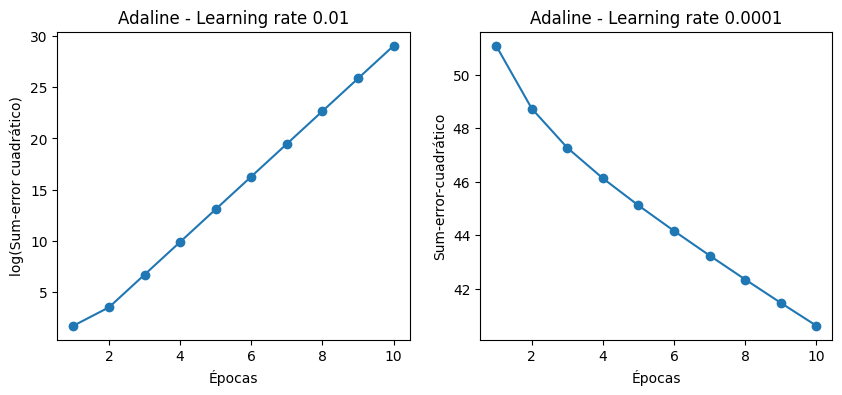

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)  # Crea y entrena Adaline con una tasa de aprendizaje de 0.01 y 10 iteraciones.
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(Sum-error cuadrático)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Sum-error-cuadrático')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### EJERCICIO 7:

# Descripción de las Gráficas:

**Gráfica Izquierda (Learning rate 0.01):**

Muestra el logaritmo del error cuadrático medio en función del número de épocas para Adaline con una tasa de aprendizaje de 0.01.
Se observa una tendencia creciente en el logaritmo del error cuadrático medio, lo que indica que el error está aumentando con cada época.
Esto sugiere que la tasa de aprendizaje de 0.01 puede ser demasiado alta, provocando que el modelo no converja adecuadamente.
La gráfica muestra que el error no se está minimizando; en cambio, está aumentando, lo que puede indicar que la tasa de aprendizaje es demasiado alta y está causando que el algoritmo "salte" alrededor del mínimo en lugar de converger hacia él.

**Gráfica Derecha (Learning rate 0.0001):**

Muestra el error cuadrático medio en función del número de épocas para Adaline con una tasa de aprendizaje de 0.0001.
Se observa una tendencia decreciente en el error cuadrático medio, lo que indica que el error está disminuyendo con cada época.
Esto sugiere que la tasa de aprendizaje de 0.0001 permite una convergencia más estable, aunque puede ser lenta. La gráfica muestra una disminución continua del error cuadrático medio, lo que indica que el modelo está aprendiendo de manera más estable y efectiva, aunque de manera más lenta.
Conclusión
Comparar las dos tasas de aprendizaje muestra la importancia de elegir una tasa adecuada para el entrenamiento de modelos de aprendizaje automático. Una tasa de aprendizaje demasiado alta puede impedir la convergencia, mientras que una tasa demasiado baja puede resultar en una convergencia muy lenta.


## Mejorando el Gradiente Descendente con escalado de características

### EJERCICIO 8: ESTANDARIZA LAS CARACTERÍSTICAS


In [41]:
# Estandarizar características
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

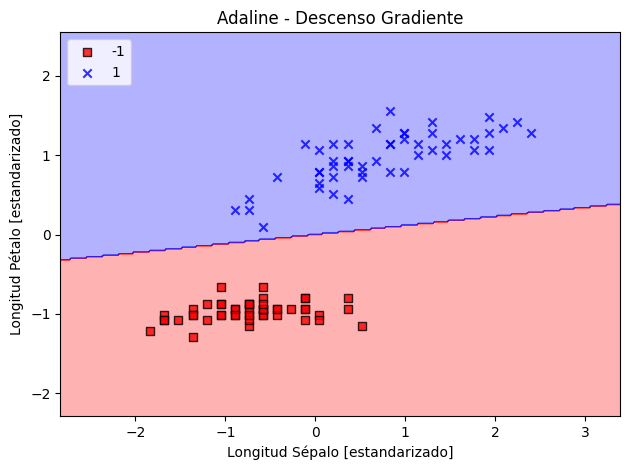

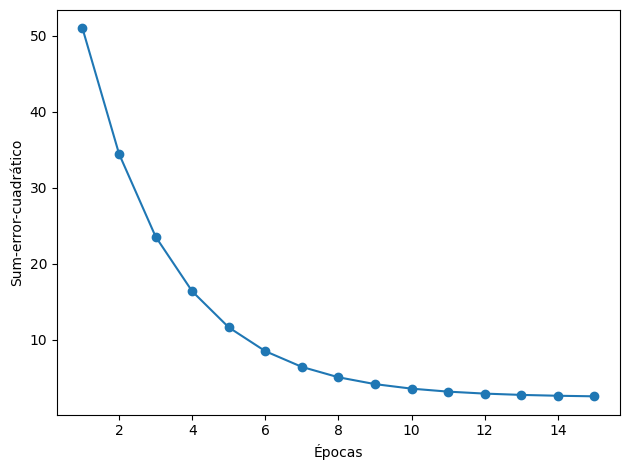

In [42]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Sum-error-cuadrático')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

**Región de Decisión (Adaline - Descenso Gradiente):**

La gráfica muestra una clara separación entre las dos clases (Iris setosa e Iris versicolor) en el espacio estandarizado de características.
La frontera de decisión indica que el modelo ha aprendido a clasificar correctamente las muestras de datos.
La estandarización de las características ha permitido una mejor convergencia del modelo, como se puede ver en la clara y precisa frontera de decisión.

**Error Cuadrático Medio (Sum-error-cuadrático):**

La gráfica muestra una disminución continua del error cuadrático medio a lo largo de las épocas, lo que indica que el modelo está aprendiendo correctamente.
La tendencia decreciente del error sugiere que el modelo está ajustando sus pesos de manera efectiva, reduciendo los errores de clasificación con cada iteración.
El hecho de que el error se estabilice cerca de cero al final del entrenamiento indica que el modelo ha alcanzado una buena convergencia.
Conclusión
Las gráficas demuestran que la estandarización de las características mejora significativamente el rendimiento del modelo Adaline. La clara separación entre las clases en la gráfica de la región de decisión y la rápida convergencia del error cuadrático medio indican que el modelo ha sido entrenado de manera efectiva. Estos resultados resaltan la importancia de preprocesar adecuadamente los datos para mejorar el rendimiento de los algoritmos de aprendizaje automático.

### EJERCICIO 9:

## Aprendizaje Automático a Gran Escala y Descendiente de Gradiente Estocástico

In [43]:
class AdalineSGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     shuffle : bool (default: True)
      Si es Verdadero, mezcla los datos de entrenamiento en cada época, para evitar ciclos.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) promediado sobre todas las muestras
       de entrenamiento en cada época.

     """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento sin reinicializar los pesos"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Mezclar los datos de entrenamiento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Inicializar pesos con pequeños números aleatorios"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Aplicar la regla de aprendizaje de Adaline para actualizar los pesos"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Calcular la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### EJERCICIO 10:

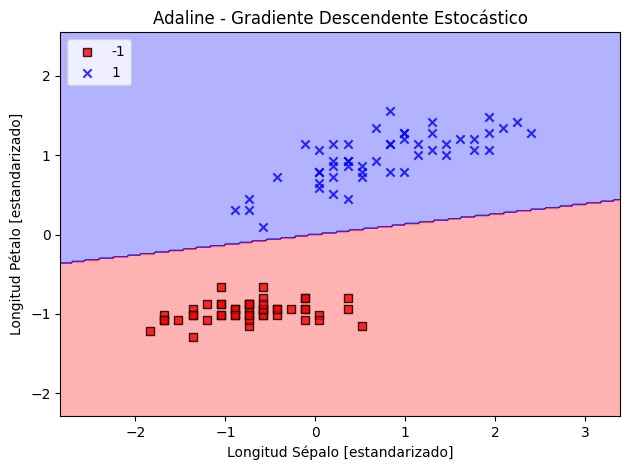

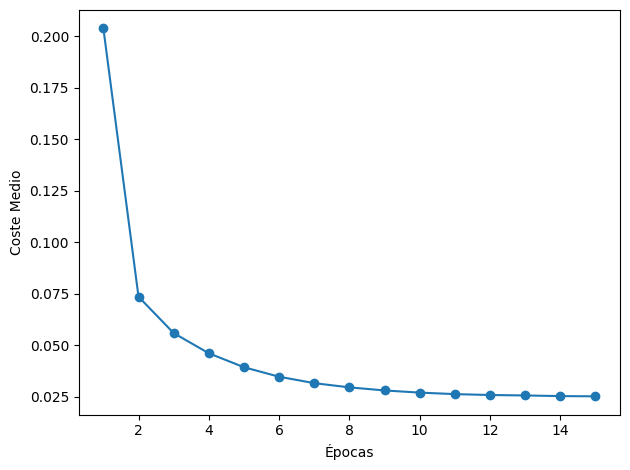

In [44]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradiente Descendente Estocástico')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Coste Medio')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()


En la gráfica actual, se observa que el coste medio disminuye rápidamente y se estabiliza, lo cual es similar a la gráfica anterior, pero la presentación del coste como "Coste Medio" en lugar de "Suma del error cuadrático" proporciona una perspectiva diferente del rendimiento del modelo.
El descenso rápido y la estabilización del coste medio indican una mejora en la convergencia del modelo, probablemente debido al uso del Gradiente Descendente Estocástico (SGD), que ajusta los pesos de manera más frecuente y con actualizaciones más pequeñas en comparación con el descenso de gradiente tradicional.

In [45]:
ada.partial_fit(X_std[0, :], y[0])